### Load Packages

In [2]:
import pandas as pd
import xarray as xr
import xagg as xa
import pygris
import us

### Download census data (county geographies)

In [3]:
state_fips = [state.fips for state in us.STATES]
counties_list = [pygris.counties(state = f, cb = True, year = 2021) for f in state_fips]
counties = pd.concat(counties_list)

#### Export census data to geoparquet

In [4]:
counties = counties.reset_index()
counties = counties.to_crs(epsg = 4326)
counties.to_parquet('us_counties_2021.parquet')

In [5]:
counties.total_bounds

array([-179.148909  ,   18.91036485,  179.77847011,   71.365162  ])

### Open and inspect the CMIP model output file

In [6]:
r = xr.open_dataset('tas_day_GISS-E2-1-G_ssp370-lowNTCF_r3i1p3f1_gn_20150101-21001231.nc')
r

<xarray.Dataset>
Dimensions:    (time: 31390, bnds: 2, lat: 90, lon: 144)
Coordinates:
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            AerChemMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    contact:                Kenneth Lo (cdkkl@giss.nasa.gov)
    ...                     ...
    title:                  GISS-E2-1-G output prepared for CMIP6
    tracking_id:            hdl:21.14100/f7993b2a-52f4-4814-8556-1a36262c78a1
    variable_id:            tas
    variant_label:          r3i1p3f1
    license:                CMIP6 model data produced by NASA Goddard Institu...
    cmor_version:           3.3.2

### Calculate and inspect area weights

In [7]:
weightmap = xa.pixel_overlaps(r,counties)

creating polygons for each pixel...
calculating overlaps between pixels and output polygons...


/Users/elizabethmohr/opt/anaconda3/envs/zonal_stats/lib/python3.11/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


success!


In [8]:
weightmap.agg

,index,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,poly_idx,rel_area,pix_idxs,coords
0,77,01,033,00161542,0500000US01033,01033,Colbert,Colbert County,AL,Alabama,06,1535742270,79160396,0,"[[0.9306947869552867, 0.06930521304471325]]","[1476, 1477]","[(35.0, -88.75), (35.0, -86.25)]"
1,119,01,051,00161551,0500000US01051,01051,Elmore,Elmore County,AL,Alabama,06,1601945704,99781063,1,[[1.0]],[1333],"[(33.0, -86.25)]"
2,146,01,023,00161537,0500000US01023,01023,Choctaw,Choctaw County,AL,Alabama,06,2365900081,19114321,2,"[[0.4775376581693775, 0.5224623418306223]]","[1188, 1332]","[(31.0, -88.75), (33.0, -88.75)]"
3,175,01,109,00161581,0500000US01109,01109,Pike,Pike County,AL,Alabama,06,1740645369,2339145,3,"[[0.023849550658511864, 0.9761504493414881]]","[1333, 1189]","[(33.0, -86.25), (31.0, -86.25)]"
4,221,01,041,00161546,0500000US01041,01041,Crenshaw,Crenshaw County,AL,Alabama,06,1576952763,5388562,4,"[[0.02426286769237331, 0.9757371323076267]]","[1333, 1189]","[(33.0, -86.25), (31.0, -86.25)]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,2950,56,043,01605085,0500000US56043,56043,Washakie,Washakie County,WY,Wyoming,06,5798152471,10415890,3137,"[[0.252658125940357, 0.09333955492227593, 0.35...","[2188, 2189, 2044, 2045]","[(45.0, -108.75), (45.0, -106.25), (43.0, -108..."
3138,2985,56,003,01605067,0500000US56003,56003,Big Horn,Big Horn County,WY,Wyoming,06,8124681753,55228616,3138,"[[0.868616155083996, 0.13138384491600397]]","[2188, 2189]","[(45.0, -108.75), (45.0, -106.25)]"
3139,3077,56,019,01609191,0500000US56019,56019,Johnson,Johnson County,WY,Wyoming,06,10759204099,52952166,3139,"[[0.5274850363449971, 0.472514963655003]]","[2189, 2045]","[(45.0, -106.25), (43.0, -106.25)]"
3140,3106,56,045,01605086,0500000US56045,56045,Weston,Weston County,WY,Wyoming,06,6210804121,5225499,3140,"[[0.020129784513999494, 0.23464722910167993, 0...","[2189, 2190, 2046, 2045]","[(45.0, -106.25), (45.0, -103.75), (43.0, -103..."


### Apply area weights to calculate mean temperature

In [9]:
aggregated = xa.aggregate(r,weightmap)

adjusting grid... (this may happen because only a subset of pixels were used for aggregation for efficiency - i.e. [subset_bbox=True] in xa.pixel_overlaps())
grid adjustment successful
aggregating tas...
all variables aggregated to polygons!


### Inspect the output

In [10]:
aggregated_ds = aggregated.to_dataset()

In [ ]:
aggregated_ds

### Map one day 

<Axes: >

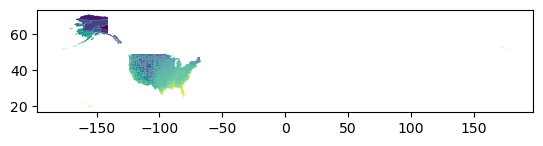

In [11]:
first_day = aggregated_ds.sel(time='2015-01-01 12:00:00').drop_indexes('time').to_dataframe()
first_day = first_day[['GEOID', 'tas']].reset_index()[['GEOID', 'tas']]
combined_dataset = counties.merge(first_day, how = 'left', on = 'GEOID')
combined_dataset.plot(column = 'tas')